# This notebook consists of 7 sections:

    1. Importing libraries and the cleaned dataset.
    2. Correlation matrix.
    3. Linear regression.
    4. Multi-variate regression.
    5. Data Visualisation.
    6. Outlier treatment.
    7. Zipcode analysis.

## 1. Importing Python Libraries and the Cleaned Dataset .csv file.

In [35]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import math
%matplotlib inline

In [36]:
df = pd.read_csv("kc_housing_data_cleaned_final.csv")
df.head(1)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,floors_std,condition_std,grade_std,sqft_above_std,sqft_basement_std,yr_built_std,yr_renovated_std,sqft_living15_std,sqft_lot15_std,distance to town_std
0,0,7129300520,10/13/2014,221900.0,3,1.0,1180,5650,1.0,0.0,...,0.0,0.5,0.4,0.089602,0.0,0.478261,0.478261,0.161934,0.005742,0.141645


## What factors correlate most with property price?

## 2. Correlation matrix.

In [37]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

## 3. Linear Regression.

### The variable that correlated the most with price was selected.

In [38]:
x1 = df['sqft_living']
y1 = df['price']
X = sm.add_constant(x1)
model_sm = sm.OLS(y1,X)
results = model_sm.fit()
results.summary()

/Users/ravimalde/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 2.075e+04
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               0.00
Time:                        12:09:17   Log-Likelihood:            -2.9764e+05
No. Observations:               21420   AIC:                         5.953e+05
Df Residuals:                   21418   BIC:                         5.953e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.355e+04   4437.546     -9.815      0.000   -5.23e+04   -3.49e+04
sqft_living   280.7740      1.949    144.056      0.000     276.954     284.594
==============================================================================
Omnibus:                    14696.823   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           539562.559
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.930   Cond. No.                     5.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### An R-squared value of 0.492 was found. This should be improved upon by including more of the variables.

## 4. Multi-variate Regression.

### The variables selected had a low correlation with eachother to minimise any negative effects of colinearity.

In [39]:
X1 = df[['sqft_living','view','waterfront','distance to town']]
y1 = df['price']
X = sm.add_constant(X1)
first_multi = sm.OLS(y1,X)
results = first_multi.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                 1.007e+04
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               0.00
Time:                        12:09:18   Log-Likelihood:            -2.9356e+05
No. Observations:               21420   AIC:                         5.871e+05
Df Residuals:                   21415   BIC:                         5.872e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.663e+05   4353.560     38.193      0.000    1.58e+05    1.75e+05
sqft_living        270.8255      1.688    160.455      0.000     267.517     274.134
view              5.961e+04   2179.527     27.348      0.000    5.53e+04    6.39e+04
waterfront        6.339e+05   1.95e+04     32.558      0.000    5.96e+05    6.72e+05
distance to town -1.802e+04    225.854    -79.807      0.000   -1.85e+04   -1.76e+04
==============================================================================
Omnibus:                    14822.040   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           815535.884
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      32.735   Cond. No.                     3.00e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
X1 = df[['sqft_living','view','waterfront','distance to town']]
y1 = df['price_dec_15']
X = sm.add_constant(X1)
first_multi = sm.OLS(y1,X)
results = first_multi.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           price_dec_15   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                 1.016e+04
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               0.00
Time:                        12:09:18   Log-Likelihood:            -2.9530e+05
No. Observations:               21420   AIC:                         5.906e+05
Df Residuals:                   21415   BIC:                         5.906e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.796e+05   4721.391     38.043      0.000     1.7e+05    1.89e+05
sqft_living        295.0472      1.830    161.187      0.000     291.459     298.635
view              6.487e+04   2363.674     27.445      0.000    6.02e+04    6.95e+04
waterfront          6.9e+05   2.11e+04     32.679      0.000    6.49e+05    7.31e+05
distance to town -1.961e+04    244.936    -80.043      0.000   -2.01e+04   -1.91e+04
==============================================================================
Omnibus:                    14898.739   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           852221.073
Skew:                           2.729   Prob(JB):                         0.00
Kurtosis:                      33.415   Cond. No.                     3.00e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
X1 = df[['sqft_living','waterfront','distance to town']]
y1 = df['price_dec_19']
X = sm.add_constant(X1)
first_multi = sm.OLS(y1,X)
results = first_multi.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           price_dec_19   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                 1.284e+04
Date:                Wed, 22 Jan 2020   Prob (F-statistic):               0.00
Time:                        12:43:40   Log-Likelihood:            -3.0227e+05
No. Observations:               21420   AIC:                         6.045e+05
Df Residuals:                   21416   BIC:                         6.046e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.353e+05   6528.490  

## 5. Data Visualisation.

### Plotting a 2D scatterplot with a line of best fit for the 'sqft_living' variable against 'price'.

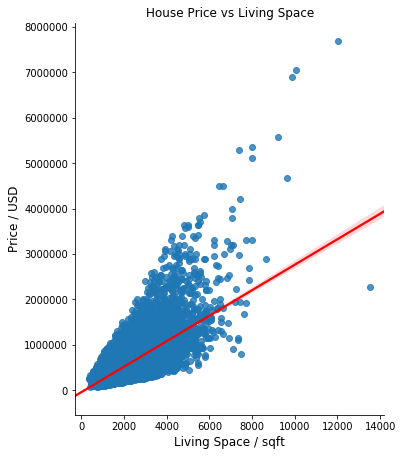

In [51]:
ax = sns.pairplot(data = df, y_vars = 'price', x_vars = 'sqft_living', kind='reg', plot_kws={'line_kws':{'color':'red'}})
# ax.fig.suptitle('Price vs Sqft Living Space', y = 1)
ax.fig.set_size_inches(7,8)
plt.xlabel('Living Space / sqft', fontsize=12)
plt.ylabel('Price / USD', fontsize=12)
plt.title('House Price vs Living Space')
plt.show()

## How does distance to Downtown Seattle affect property price?

### Plotting a bar graph of the 'distance to town' variable against 'price'.

#### Separating the 'distance to town' variable into bins.

In [43]:
pd.cut(df['distance to town'], bins=np.linspace(min(df['distance to town']), max(df['distance to town']), 6))

0         (0.718, 10.181]
1         (0.718, 10.181]
2        (10.181, 19.645]
3         (0.718, 10.181]
4         (0.718, 10.181]
               ...       
21415     (0.718, 10.181]
21416    (10.181, 19.645]
21417    (10.181, 19.645]
21418     (0.718, 10.181]
21419     (0.718, 10.181]
Name: distance to town, Length: 21420, dtype: category
Categories (5, interval[float64]): [(0.718, 10.181] < (10.181, 19.645] < (19.645, 29.109] < (29.109, 38.573] < (38.573, 48.037]]

In [44]:
df['distance_to_town_categories'] = pd.cut(df['distance to town'], bins=np.linspace(min(df['distance to town']),
                                                                                    max(df['distance to town']), 6))

Text(0.5, 1.0, 'House Price vs Distance to Downtown Seattle')

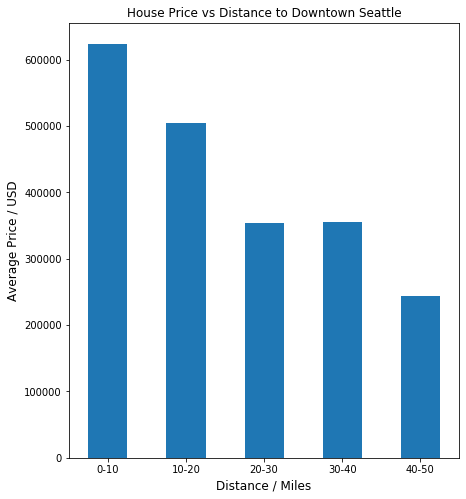

In [102]:
plt.figure(figsize=(7,8))
df.groupby('distance_to_town_categories')['price'].mean().plot.bar()
positions = (0, 1, 2, 3, 4)
plt.xticks(positions,['0-10','10-20','20-30','30-40','40-50'],rotation='horizontal')
plt.xlabel('Distance / Miles', fontsize = 12)
plt.ylabel('Average Price / USD', fontsize = 12)
plt.title('House Price vs Distance to Downtown Seattle')

### Plotting a 2D scatterplot with a line of best fit for the 'view' variable against 'price'.

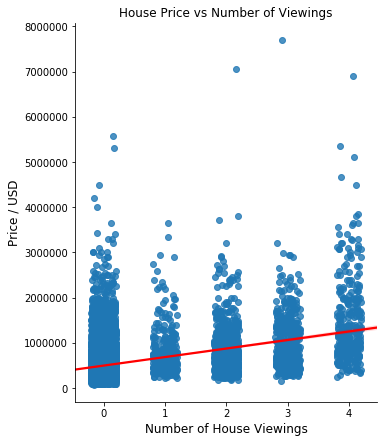

In [33]:
fig = sns.lmplot(y='price', x='view', data = df, x_jitter = 0.2, line_kws={'color': 'red'}, size=6, aspect=0.9)
plt.xlabel('Number of House Viewings', fontsize=12)
plt.ylabel('Price / USD', fontsize=12)
plt.title('House Price vs Number of Viewings')
position = (0,1,2,3,4)
plt.xticks(position,[0,1,2,3,4])
plt.show()

### Plotting a 2D scatterplot with a line of best fit for the 'waterfront' variable against 'price'.

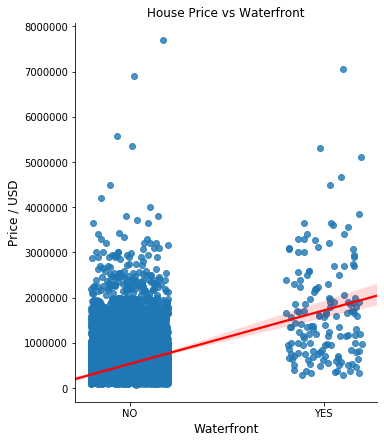

In [52]:
sns.lmplot(y = 'price', x = 'waterfront', data = df, x_jitter=0.2, line_kws={'color': 'red'}, size=6, aspect=0.9)
plt.xlabel('Waterfront', fontsize=12)
plt.ylabel('Price / USD', fontsize=12)
plt.title('House Price vs Waterfront')
position = (0,1)
plt.xticks(position,['NO','YES'])
plt.show()

## 6. Outlier Treatment.

### Plotting a boxplot of 'sqft_living' to determine which way the dataset was skewed.

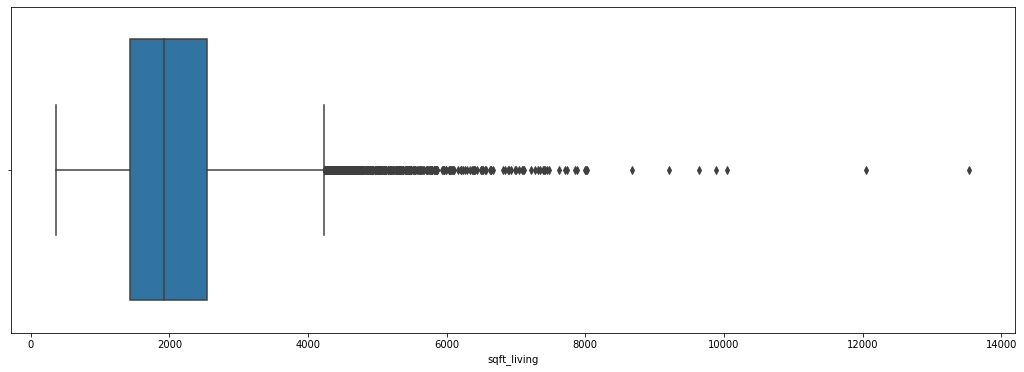

In [8]:
plt.figure(figsize=(18,6))

display(sns.boxplot(x = df['sqft_living']))

### Calculating how many outliers lie within the dataset based on a set cut-off point (in terms of std deviation).

In [7]:
# calculate summary statistics
variable = 'sqft_living'
data_mean, data_std = mean(df[variable]), std(df[variable])
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
print(upper)
# identify outliers
outliers = [x for x in df[variable] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in df[variable] if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

4839.493524661113
Identified outliers: 247
Non-outlier observations: 21173


### Outliers were not removed as it worsened the R-squared value.

In [8]:
# df_original = df.copy()

# variable = 'sqft_living'
# data_mean, data_std = mean(df[variable]), std(df[variable])
# cut_off = data_std * 3

# for i in range(len(df)):
#     if df.loc[i,variable] < (data_mean - cut_off) or df.loc[i,variable] > (data_mean + cut_off):
#         df.drop([i], inplace=True)
#     else:
#         continue

# print(len(df))

In [9]:
# x1 = df['sqft_living']
# y1 = df['price']
# X = sm.add_constant(x1)
# model_sm = sm.OLS(y1,X)
# results = model_sm.fit()
# results.summary()

## How does the zipcode of a property affect its price?

## 7. Zipcode Analysis.

In [57]:
unique_zips = df['zipcode'].unique()
len(unique_zips)

70

### Plotting the average sale price in individual postcodes.

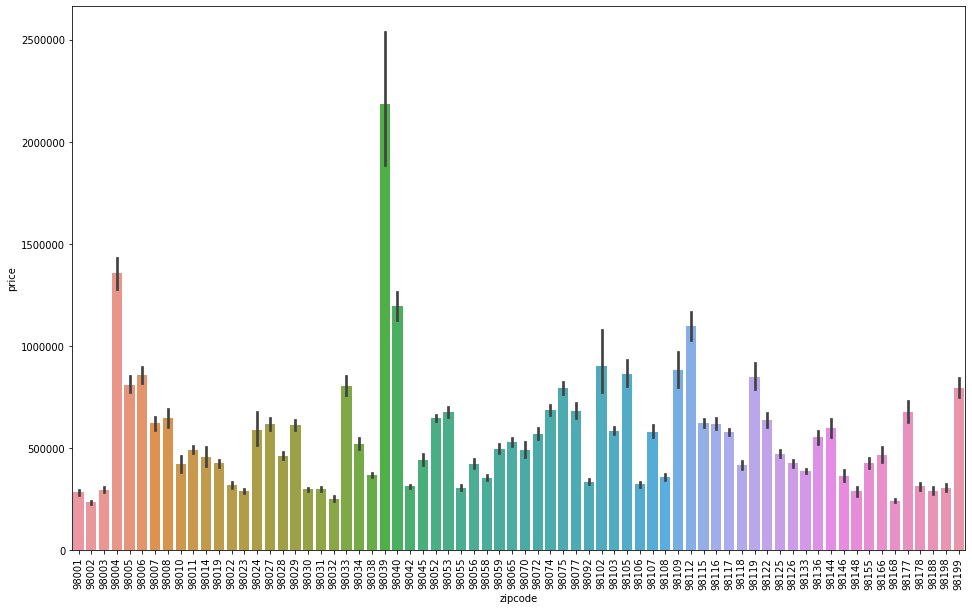

In [58]:
plt.figure(figsize=(16, 10))
sns.barplot(x='zipcode',y='price',data=df)
plt.xticks(rotation=90)
plt.show()

### Defining a function to calculate the R-squared value of each zipcode.

In [59]:
def zipcode_r_squared(df_zipcode, variable1, variable2, variable3):

    X1 = df_zipcode[[variable1,variable2,variable3]]
    y1 = df_zipcode['price_dec_19']
    X = sm.add_constant(X1)
    first_multi = sm.OLS(y1,X)
    results = first_multi.fit()
    r2 = results.rsquared
    return r2

### Iterating through the unique zipcodes and appending the R-squared value to a list.

In [60]:
variable1 = 'sqft_living'
variable2 = 'sqft_lot'
variable3 = 'view'

zipcode_r_squared_values = []
unique_zips = df['zipcode'].unique()

for zipcode in unique_zips:
    
    df_zipcode = df.loc[df['zipcode'] == zipcode]
    r2 = zipcode_r_squared(df_zipcode, variable1, variable2, variable3)
    zipcode_r_squared_values.append(r2)

# zipcode_r_squared_values

/Users/ravimalde/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Creating a new list (same length as the number of unique zips) of the original data's R-squared value.

In [97]:
X1 = df[['sqft_living','waterfront','distance to town']]
y1 = df['price']
X = sm.add_constant(X1)
first_multi = sm.OLS(y1,X)
results = first_multi.fit()
r2 = results.rsquared

entire_df_r_squared = [r2] * len(unique_zips)

### Calculating the difference between the R-squared values.

In [62]:
zipcode_r_squared_values_array = np.asarray(zipcode_r_squared_values)
entire_df_r_squared_array = np.asarray(entire_df_r_squared)

r_squared_difference = zipcode_r_squared_values_array - entire_df_r_squared_array
# r_squared_difference

### Creating a dictionary of the three lists and making it into a dataframe.

In [63]:
zipcode_r_squared_dict = {'zipcode_r_squared' : zipcode_r_squared_values,
                            'original_r_squared' : entire_df_r_squared,
                                'r_squared_difference' : r_squared_difference}

In [64]:
difference_in_r_squared = pd.DataFrame(zipcode_r_squared_dict)
difference_in_r_squared

,zipcode_r_squared,original_r_squared,r_squared_difference
0,0.647046,0.640772,0.006274
1,0.696170,0.640772,0.055398
2,0.687787,0.640772,0.047015
3,0.726324,0.640772,0.085552
4,0.665461,0.640772,0.024690
...,...,...,...
65,0.525904,0.640772,-0.114868
66,0.794201,0.640772,0.153429
67,0.555790,0.640772,-0.084982
68,0.841389,0.640772,0.200618


### Calculating the mean R-squared difference.

In [100]:
difference_in_r_squared['r_squared_difference'].mean()
difference_in_r_squared['zipcode_r_squared'].mean()

0.6995493410673228

In [76]:
# max(zipcode_r_squared_values)
min(zipcode_r_squared_values)

0.44249475645661407

In [77]:
zipcode_r_squared_values.index(0.44249475645661407)

19

In [94]:
unique_zips[19]

98133

In [95]:
df_zipcode = df.loc[df['zipcode'] == 98133]

In [99]:
X1 = df_zipcode[['sqft_living','waterfront','distance to town']]
y1 = df_zipcode['price']
X = sm.add_constant(X1)
first_multi = sm.OLS(y1,X)
results = first_multi.fit()
r2 = results.rsquared
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     210.4
Date:                Wed, 22 Jan 2020   Prob (F-statistic):           2.28e-66
Time:                        13:07:26   Log-Likelihood:                -6109.0
No. Observations:                 484   AIC:                         1.222e+04
Df Residuals:                     481   BIC:                         1.224e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.942e+05   2.09e+04  

In [90]:
pd.set_option('display.max_rows', 70)
print(difference_in_r_squared)

    zipcode_r_squared  original_r_squared  r_squared_difference
0            0.647046            0.640772              0.006274
1            0.696170            0.640772              0.055398
2            0.687787            0.640772              0.047015
3            0.726324            0.640772              0.085552
4            0.665461            0.640772              0.024690
5            0.609143            0.640772             -0.031629
6            0.796228            0.640772              0.155456
7            0.747794            0.640772              0.107022
8            0.746463            0.640772              0.105691
9            0.611773            0.640772             -0.028999
10           0.545410            0.640772             -0.095362
11           0.571068            0.640772             -0.069704
12           0.721220            0.640772              0.080448
13           0.750753            0.640772              0.109981
14           0.730587            0.64077